In [1]:
from collections import defaultdict
import os
import json
import sys
from decentralizepy.graphs.MobilityGraph import MobilityGraph
import numpy as np
import matplotlib.pyplot as plt    

from animate_graph import find_last_graph_file


def average_of_first_percent(lst, p):
    n = int(len(lst) * p)
    return np.mean(lst[:n])

def average_of_last_percent(lst, p):
    n = int(len(lst) * p)
    return np.mean(lst[-n:])

num_nodes = 48
# rounds_cutoff = float('inf')
rounds_cutoff = 200
graphs_dir = ".sim"
high_mobility_proportion = 0.8

def high_mobility_nodes(g: MobilityGraph):
    n = int(len(g.nodes) * high_mobility_proportion)
    return g.nodes[:n]

def low_mobility_nodes(g: MobilityGraph):  
    n_low = int(len(g.nodes) * high_mobility_proportion)
    return g.nodes[n_low:]

graphs: list[MobilityGraph] = []
last_graph_file_number = find_last_graph_file(graphs_dir)
for i in range(1, last_graph_file_number + 1):
    file_path = os.path.join(graphs_dir, f"graph_{i}.txt")
    if os.path.exists(file_path):
        g = MobilityGraph()
        g.read_graph_from_file(file_path)
        graphs.append(g)
    else:
        print(f"File graph_{i}.txt does not exist in the directory.")
        sys.exit(1)

n = len(graphs)
high_mobility_neighbors = [defaultdict(set) for _ in range(n)]
low_mobility_neighbors = [defaultdict(set) for _ in range(n)]

for (i, g) in enumerate(graphs):
    h_nodes = high_mobility_nodes(g)
    l_nodes = low_mobility_nodes(g)

    print("High mobility nodes:", [node.uid for node in h_nodes])
    print("High mobility nodes velocities:", [node.velocity for node in h_nodes])
    print("Low mobility nodes:", [node.uid for node in l_nodes])
    print("Low mobility nodes velocities:", [node.velocity for node in l_nodes])

    for node in h_nodes:
        high_mobility_neighbors[i][node.uid] = set(g.neighbors(node.uid))
    
    for node in l_nodes:
        low_mobility_neighbors[i][node.uid] = set(g.neighbors(node.uid))
    


High mobility nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]
High mobility nodes velocities: [222.73913520645573, 325.6053181037845, 295.6057456389766, 242.57696469828593, 311.16808836862737, 183.47648451106747, 334.8913616546994, 331.28121897453457, 234.30637716678945, 198.9127849531872, 277.2712694720099, 308.4011999783528, 188.68246113834232, 240.3576381840743, 175.40574798204779, 298.4730759405154, 344.5396518706707, 349.85543156092876, 347.7262242443858, 245.92239988073013, 302.7951728409933, 240.2135716465274, 209.81444841253114, 200.92141003626512, 22.678675026654993, 90.16537220694988, 60.17356440459297, 35.06674278246299, 77.12125504712911, 34.77939951731395, 95.05523517180534, 13.098520679257275, 45.315939304180176, 27.263018469549806, 8.072952619124719, 85.75004923692782, 92.29360153238908, 66.4534959821614]
Low mobility nodes: [38, 39, 40, 41, 42, 43, 44, 45, 46, 47]
Low m

[4.2894736842105265, 3.789473684210526, 4.868421052631579, 5.105263157894737, 5.157894736842105, 5.026315789473684, 4.973684210526316, 4.552631578947368, 4.7894736842105265, 6.078947368421052, 4.7631578947368425, 4.105263157894737, 4.973684210526316, 3.9210526315789473, 5.105263157894737, 4.631578947368421, 4.368421052631579, 5.131578947368421, 5.842105263157895, 5.2631578947368425, 5.2368421052631575, 5.657894736842105, 5.184210526315789, 6.2894736842105265, 5.7894736842105265, 5.921052631578948, 5.0, 4.605263157894737, 4.2105263157894735, 4.894736842105263, 4.315789473684211, 4.157894736842105, 4.447368421052632, 5.394736842105263, 4.894736842105263, 5.105263157894737, 4.947368421052632, 4.973684210526316, 4.973684210526316, 5.7105263157894735, 6.394736842105263, 4.684210526315789, 4.421052631578948, 3.736842105263158, 4.473684210526316, 4.342105263157895, 4.947368421052632, 5.052631578947368, 4.973684210526316, 4.815789473684211, 4.526315789473684, 4.7631578947368425, 5.578947368421

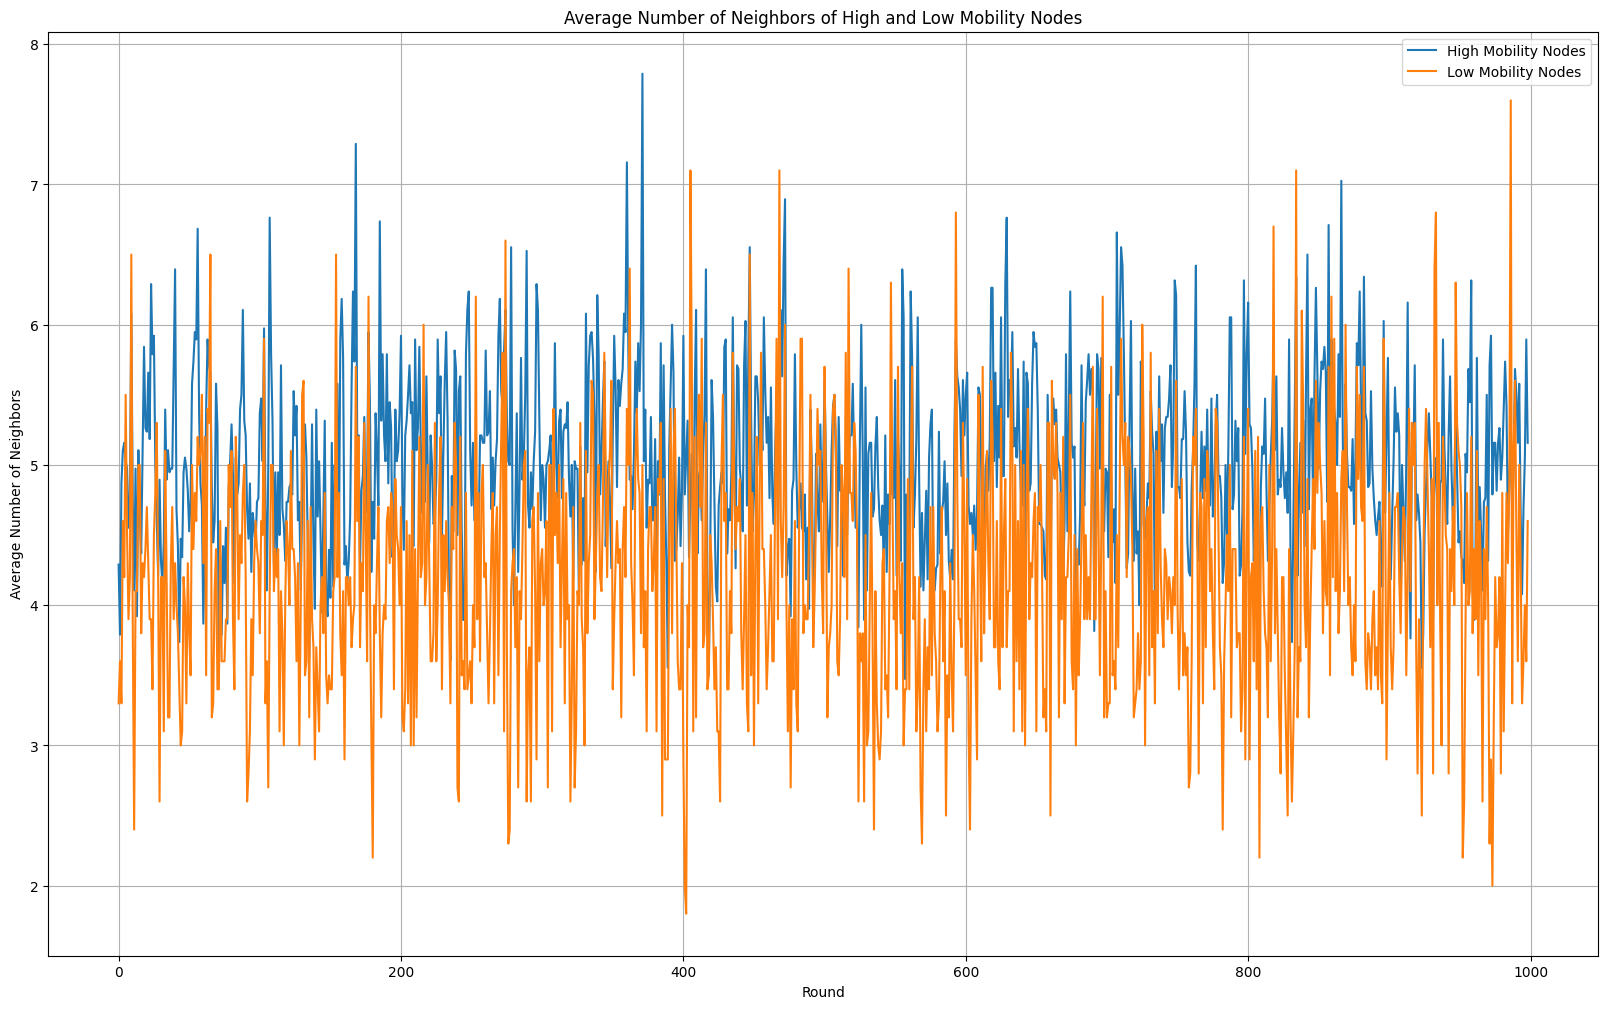

In [2]:
plt.figure(figsize=(20, 12))

average_num_neighbors_high_mobility = [np.mean([len(high_mobility_neighbors[i][node.uid]) for node in high_mobility_nodes(g)]) for i, g in enumerate(graphs)]
average_num_neighbors_low_mobility = [np.mean([len(low_mobility_neighbors[i][node.uid]) for node in low_mobility_nodes(g)]) for i, g in enumerate(graphs)]

print(average_num_neighbors_high_mobility)
print(average_num_neighbors_low_mobility)

plt.plot(average_num_neighbors_high_mobility, label="High Mobility Nodes")
plt.plot(average_num_neighbors_low_mobility, label="Low Mobility Nodes")

plt.xlabel("Round")
plt.ylabel("Average Number of Neighbors")
plt.title("Average Number of Neighbors of High and Low Mobility Nodes")
plt.legend()
plt.grid(True)
plt.show()


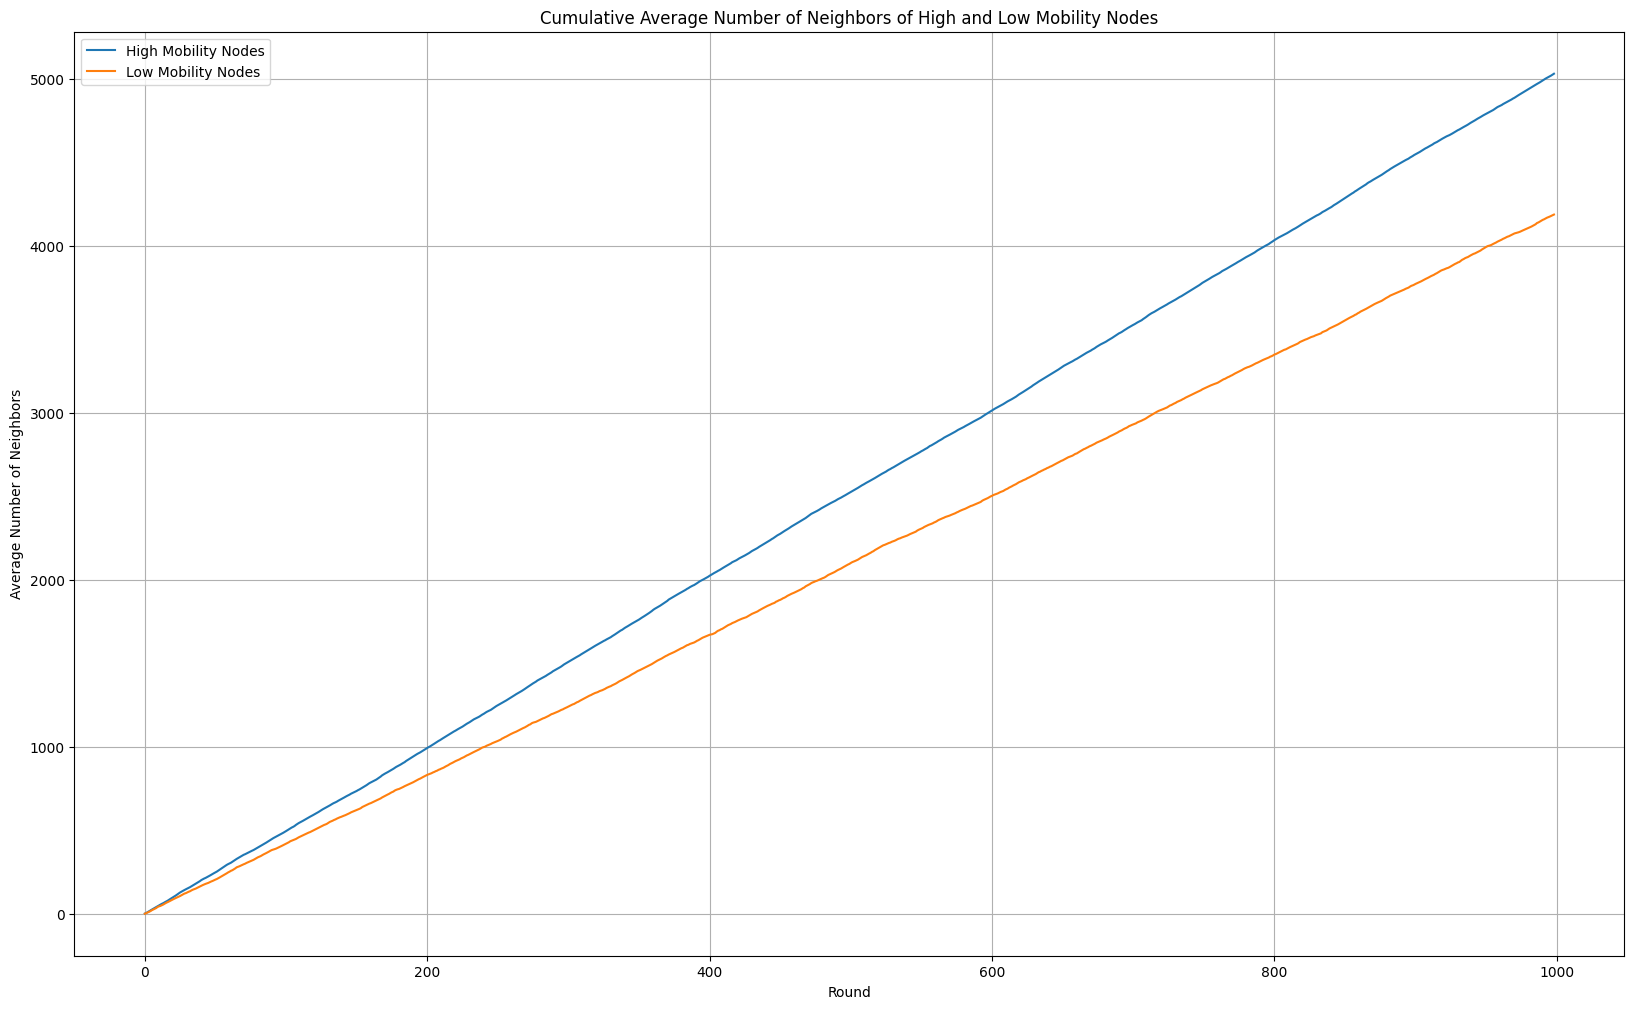

In [3]:
cumulative_num_neighbors_high_mobility = np.cumsum(np.array(average_num_neighbors_high_mobility))
cumulative_num_neighbors_low_mobility = np.cumsum(np.array(average_num_neighbors_low_mobility))

plt.figure(figsize=(20, 12))

plt.plot(cumulative_num_neighbors_high_mobility, label="High Mobility Nodes")
plt.plot(cumulative_num_neighbors_low_mobility, label="Low Mobility Nodes")

plt.xlabel("Round")
plt.ylabel("Average Number of Neighbors")
plt.title("Cumulative Average Number of Neighbors of High and Low Mobility Nodes")
plt.legend()
plt.grid(True)


[168.39127630871607, 158.5512306833225, 174.85468464934394, 195.35429113242853, 192.7513844264494, 198.66147598922487, 189.28519092864545, 193.16947352088187, 177.13335113551946, 201.8996206986957, 180.32477015859445, 178.9289272941397, 192.70016598597886, 167.87454020024106, 189.50013570825502, 185.45259066997272, 184.5376616357517, 199.0874036044354, 219.57036315113635, 201.75393688533643, 197.18191899734478, 223.92303007598974, 188.39384497049866, 199.52588540242328, 184.85174399481141, 193.85137967843633, 174.33412280607703, 167.43807546967562, 175.10301647662527, 182.00280031505605, 187.77502570531726, 173.92435148231337, 192.99798657581997, 181.04764651374117, 183.36118755106412, 203.77847604353855, 176.3538563633905, 185.1316590386813, 175.4796292549387, 175.66037596987243, 182.28302472159984, 189.48274430416026, 172.15579973112918, 156.87052439599458, 164.5804002711891, 157.86023063198826, 173.29076268175118, 185.16826783097716, 167.1104052219554, 181.4329534697318, 174.2468704

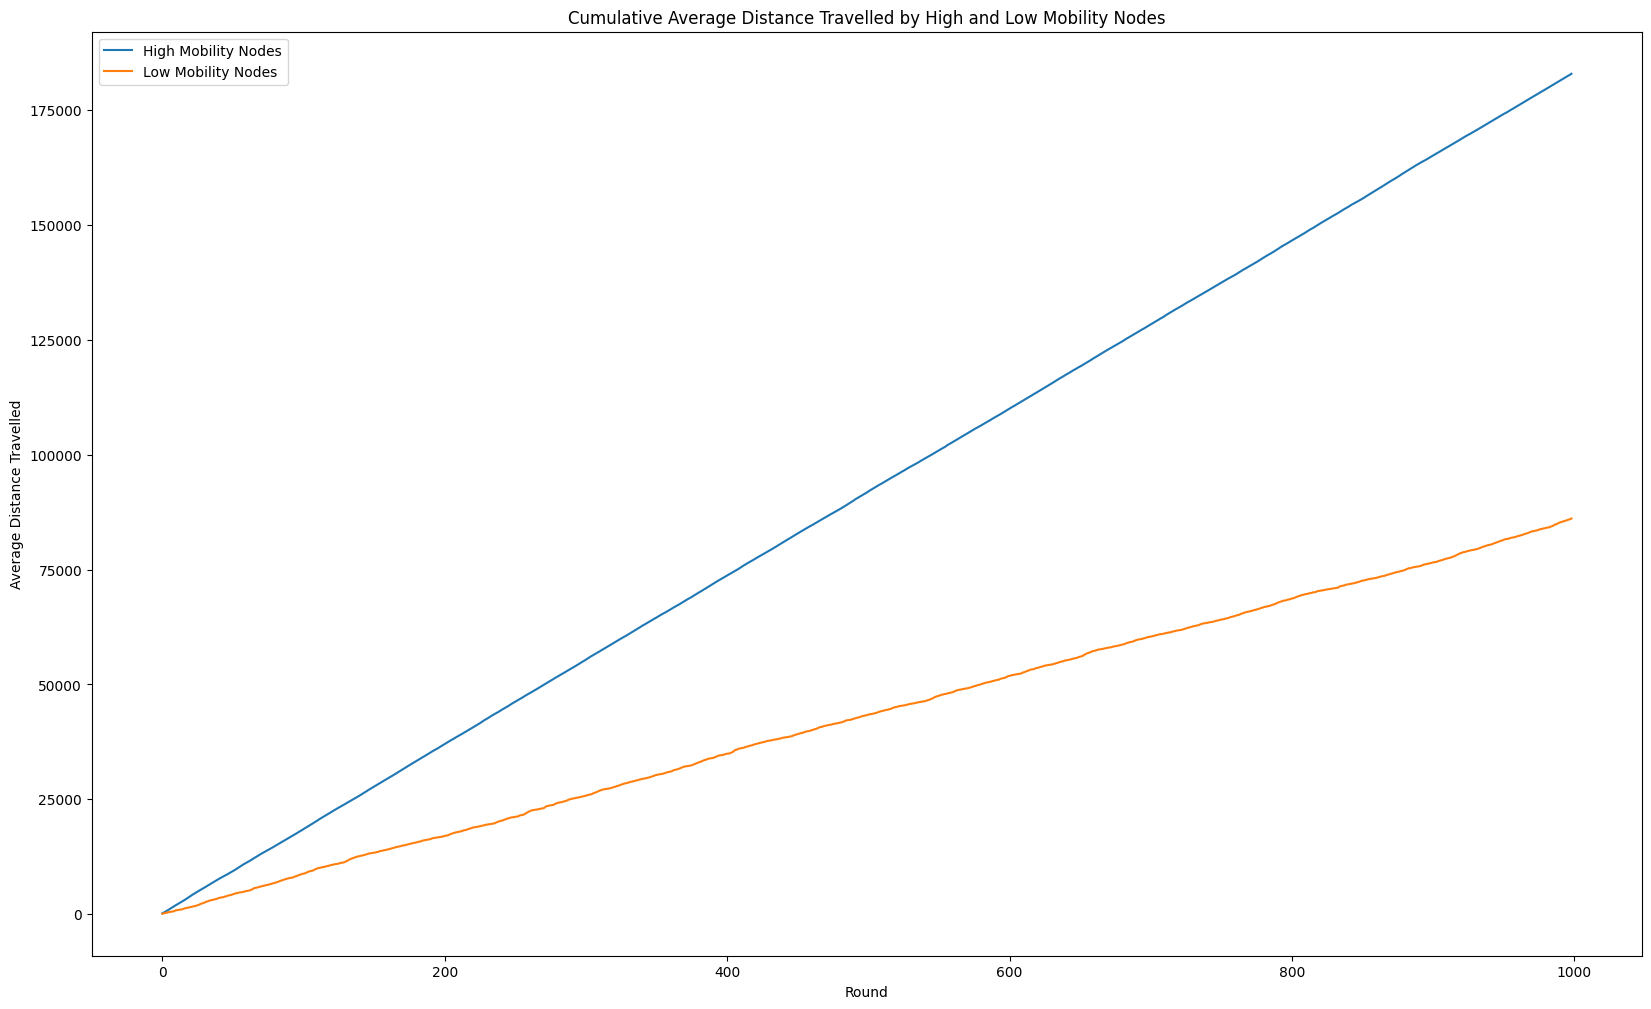

In [4]:
from decentralizepy.graphs.MobilityNode import MobilityNode


def get_node_distance_travelled(node: MobilityNode):
    return np.linalg.norm(np.array(node.pos_vec) - np.array(node.previous_pos_vec))

high_mobility_nodes_distances = [np.mean([get_node_distance_travelled(node) for node in high_mobility_nodes(g)]) for g in graphs]
low_mobility_nodes_distances = [np.mean([get_node_distance_travelled(node) for node in low_mobility_nodes(g)]) for g in graphs]
print(high_mobility_nodes_distances)
print(low_mobility_nodes_distances)

cum_high_mobility_nodes_distances = np.cumsum(np.array(high_mobility_nodes_distances))
cum_low_mobility_nodes_distances = np.cumsum(np.array(low_mobility_nodes_distances))

plt.figure(figsize=(20, 12))

plt.plot(cum_high_mobility_nodes_distances, label="High Mobility Nodes")
plt.plot(cum_low_mobility_nodes_distances, label="Low Mobility Nodes")

plt.xlabel("Round")
plt.ylabel("Average Distance Travelled")
plt.title("Cumulative Average Distance Travelled by High and Low Mobility Nodes")
plt.legend()
plt.show()

In [7]:
average_high_mobility_velocity = [np.mean([node.velocity for node in high_mobility_nodes(g)]) for g in graphs][0]
average_low_mobility_velocity = [np.mean([node.velocity for node in low_mobility_nodes(g)]) for g in graphs][0]

print("Average High Mobility Velocity:", average_high_mobility_velocity)
print("Average Low Mobility Velocity:", average_low_mobility_velocity)

Average High Mobility Velocity: 188.53239485382323
Average Low Mobility Velocity: 49.5148352446352
